### Step 1: Load the MNIST dataset, load all necessary modules

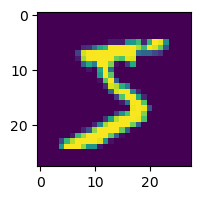

In [1]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from beam import BEAM, load
from torchvision import datasets
from sklearn.preprocessing import StandardScaler
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
scaler = StandardScaler()
X = train_dataset.data.numpy()
n_examples = X.shape[0]
X = X.reshape(n_examples, -1)
X = scaler.fit_transform(X)
y = train_dataset.targets.numpy()
plt.figure(figsize=(2, 2))
plt.imshow(scaler.inverse_transform(X[0].reshape(1, -1)).reshape(28, 28))

### Step 2: Train the RBM (no adversary)

In [2]:
X = X[:2000]
model = BEAM(
    n_vis=784,
    n_hid=300
)
model.fit(
    X = X,
    n_gibbs=5,
    lr=0.01,
    n_epochs=300,
    batch_size=50,
    gamma=1,
    gamma_delay=25,
    rng_seed=0,
    verbose=True,
    checkpoint_path=f'{directory_path}/beam_checkpoints/beam_mnist_demo.pth'
)

epoch: 005 of 300 | recon_loss: 0.5640000104904175
epoch: 010 of 300 | recon_loss: 0.5199999809265137
epoch: 015 of 300 | recon_loss: 0.4909999966621399
epoch: 020 of 300 | recon_loss: 0.45100000500679016
epoch: 025 of 300 | recon_loss: 0.4300000071525574
epoch: 030 of 300 | recon_loss: 0.4169999957084656
epoch: 035 of 300 | recon_loss: 0.40799999237060547
epoch: 040 of 300 | recon_loss: 0.4009999930858612
epoch: 045 of 300 | recon_loss: 0.39399999380111694
epoch: 050 of 300 | recon_loss: 0.3869999945163727
epoch: 055 of 300 | recon_loss: 0.3840000033378601
epoch: 060 of 300 | recon_loss: 0.3779999911785126
epoch: 065 of 300 | recon_loss: 0.37299999594688416
epoch: 070 of 300 | recon_loss: 0.3709999918937683
epoch: 075 of 300 | recon_loss: 0.367000013589859
epoch: 080 of 300 | recon_loss: 0.35899999737739563
epoch: 085 of 300 | recon_loss: 0.7789999842643738
epoch: 090 of 300 | recon_loss: 0.39899998903274536
epoch: 095 of 300 | recon_loss: 0.3409999907016754
epoch: 100 of 300 | recon_

### Step 3: Visualize samples

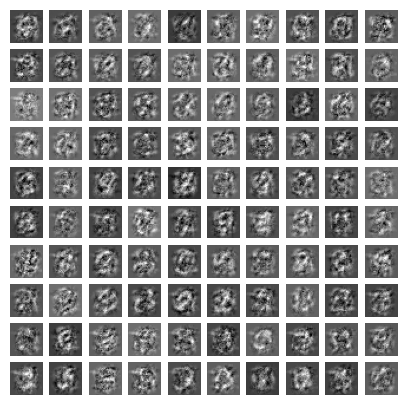

In [2]:
model = load(f'{directory_path}/beam_checkpoints/beam_mnist_demo.pth')
samples = model.reconstruct(np.zeros((100, 784)), n_gibbs=200)
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(scaler.inverse_transform(samples[i].reshape(1, -1))\
                   .reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()

### Repeat Step 2 for BEAM (trained with adversary)

In [8]:
X = X[:2000]
model = BEAM(
    n_vis=784,
    n_hid=1000
)
model.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=300,
    batch_size=50,
    gamma=0.5,
    gamma_delay=50,
    rng_seed=0,
    verbose=True,
    checkpoint_path=f'{directory_path}/beam_checkpoints/beam_mnist_demo_adv.pth'
)

epoch: 005 of 300 | recon_loss: 0.46799999475479126
epoch: 010 of 300 | recon_loss: 0.4309999942779541
epoch: 015 of 300 | recon_loss: 0.4000000059604645
epoch: 020 of 300 | recon_loss: 0.3700000047683716
epoch: 025 of 300 | recon_loss: 0.33799999952316284
epoch: 030 of 300 | recon_loss: 0.3109999895095825
epoch: 035 of 300 | recon_loss: 0.28299999237060547
epoch: 040 of 300 | recon_loss: 0.26100000739097595
epoch: 045 of 300 | recon_loss: 0.24400000274181366
epoch: 050 of 300 | recon_loss: 0.23199999332427979
epoch: 055 of 300 | recon_loss: 0.18199999630451202
epoch: 060 of 300 | recon_loss: 0.1850000023841858
epoch: 065 of 300 | recon_loss: 0.18400000035762787
epoch: 070 of 300 | recon_loss: 0.13600000739097595
epoch: 075 of 300 | recon_loss: 0.1289999932050705
epoch: 080 of 300 | recon_loss: 0.125
epoch: 085 of 300 | recon_loss: 0.12300000339746475
epoch: 090 of 300 | recon_loss: 0.12099999934434891
epoch: 095 of 300 | recon_loss: 0.11999999731779099
epoch: 100 of 300 | recon_loss: 

### Repeat Step 3 for BEAM (trained with adversary)

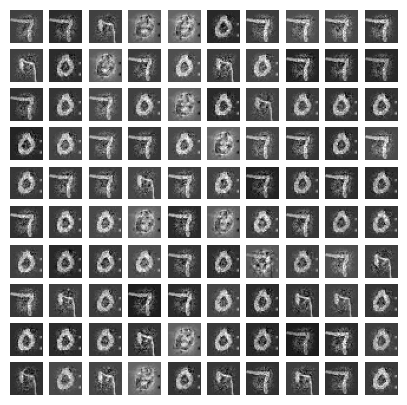

In [10]:
model = load(f'{directory_path}/beam_checkpoints/beam_mnist_demo_adv.pth')
samples = model.reconstruct(np.zeros((100, 784)), n_gibbs=200)
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(scaler.inverse_transform(samples[i].reshape(1, -1))\
                   .reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()